<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h1 align="center" style="color:#ffffff;"><b>SerieHub Movie Recommendation System 🎬</b></h1>
</div>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [2]:
!pip3 install -q numpy pandas matplotlib plotly wordcloud scikit-learn

In [3]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import save_npz
import warnings
warnings.filterwarnings('ignore')

In [4]:
netflix_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projet Movie Recommendation System/TMDB_movie_dataset_v11.csv")
netflix_data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>DATA PRE-PROCESSING AND EDA</b></h2>
</div>

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058675 entries, 0 to 1058674
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1058675 non-null  int64  
 1   title                 1058663 non-null  object 
 2   vote_average          1058675 non-null  float64
 3   vote_count            1058675 non-null  int64  
 4   status                1058675 non-null  object 
 5   release_date          915240 non-null   object 
 6   revenue               1058675 non-null  int64  
 7   runtime               1058675 non-null  int64  
 8   adult                 1058675 non-null  bool   
 9   backdrop_path         290852 non-null   object 
 10  budget                1058675 non-null  int64  
 11  homepage              114186 non-null   object 
 12  imdb_id               585588 non-null   object 
 13  original_language     1058675 non-null  object 
 14  original_title        1058663 non-

In [6]:
netflix_data.isnull().sum()

id                           0
title                       12
vote_average                 0
vote_count                   0
status                       0
release_date            143435
revenue                      0
runtime                      0
adult                        0
backdrop_path           767823
budget                       0
homepage                944489
imdb_id                 473087
original_language            0
original_title              12
overview                198098
popularity                   0
poster_path             310183
tagline                 907680
genres                  404286
production_companies    566046
production_countries    446760
spoken_languages        431855
keywords                760444
dtype: int64

In [7]:
netflix_data.fillna('', inplace=True)

In [8]:
netflix_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1058675.0,NaN,NaN,NaN,695617.751334,372358.604535,2.0,387633.5,697423.0,1022195.5,1311309.0
title,1058675,910266,Home,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,1058675.0,NaN,NaN,NaN,2.002076,3.072888,0.0,0.0,0.0,5.0,10.0
vote_count,1058675.0,NaN,NaN,NaN,20.258142,329.98762,0.0,0.0,0.0,1.0,34495.0
status,1058675,6,Released,1038273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,1058675,42455,,143435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,1058675.0,NaN,NaN,NaN,715727.965945,17998554.313296,-12.0,0.0,0.0,0.0,3000000000.0
runtime,1058675.0,NaN,NaN,NaN,49.443295,62.059077,-28.0,0.0,27.0,90.0,14400.0
adult,1058675,2,False,960052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
backdrop_path,1058675,288428,,767823,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(netflix_data.columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


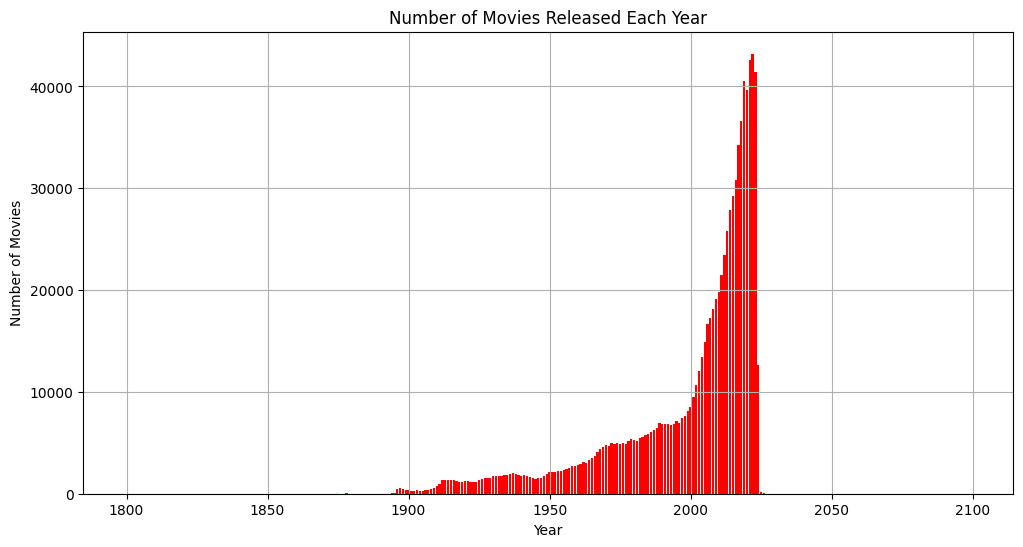

In [10]:
import matplotlib.pyplot as plt

# Assuming the column with release year information is 'release_date' or 'release_year'
# Let's extract the year from 'release_date' if it's in a date format

# If the dataset has a 'release_date' column as a full date, convert it to extract the year
if 'release_date' in netflix_data.columns:
    netflix_data['release_year'] = pd.to_datetime(netflix_data['release_date'], errors='coerce').dt.year
elif 'release_year' in netflix_data.columns:
    netflix_data['release_year'] = netflix_data['release_year']
else:
    print("No suitable column found for release year.")
    netflix_data['release_year'] = None

# Drop rows with missing release year
netflix_data = netflix_data.dropna(subset=['release_year'])

# Count the number of movies released each year
movie_counts = netflix_data['release_year'].value_counts().sort_index()

# Create the bar chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(movie_counts.index, movie_counts.values, color='red')

# Customize the plot
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)  # Enable grid for better readability

# Display the plot
plt.show()

In [15]:
top_production = netflix_data['production_companies'].value_counts().head(10)

fig = px.treemap(names=top_production.index, parents=["" for _ in top_production.index], values=top_production.values)

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Top Production companies with Highest Number of Movies',
)
fig.show()

In [16]:
ratings       = list(netflix_data['runtime'].value_counts().index)
rating_counts = list(netflix_data['runtime'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Durations Distribution',
    xaxis_title='Duration',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

fig.show()

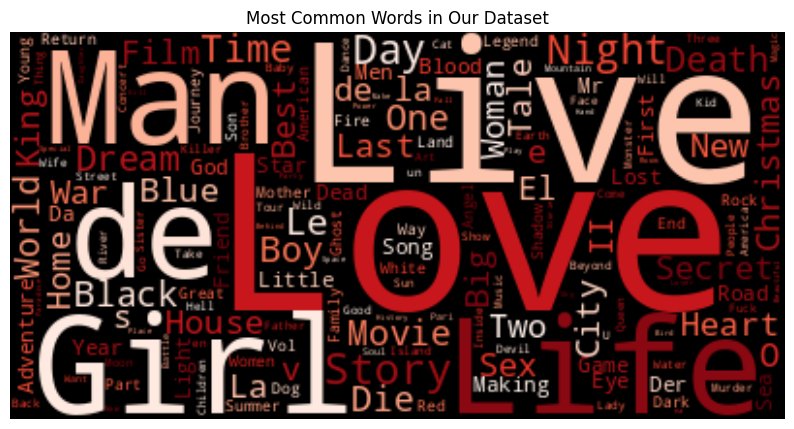

In [13]:
titles = netflix_data['title'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Our Dataset', color='black')
plt.show()

In [14]:
titles = netflix_data['overview'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='black')
plt.show()

KeyboardInterrupt: 

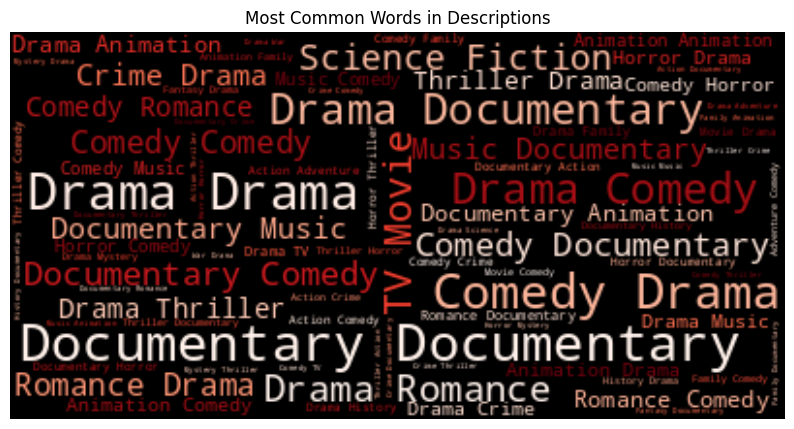

In [18]:
titles = netflix_data['genres'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Descriptions', color='Black')
plt.show()

In [19]:
netflix_data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,release_year
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",2010.0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",2014.0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",2008.0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",2009.0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058667,709105,Thanks for the Add!,0.000,0,Released,2006-05-01,0,5,False,,...,A woman borrows a man's cell phone and makes a...,0.600,,,Drama,,United States of America,English,,2006.0
1058668,709106,Amiga: O Computador da Década,0.000,0,Released,1990-12-31,0,0,False,,...,The Commodore Amiga arrived in Brazil in 1990 ...,0.600,/gAG64QpqG9ZZSapwAsMwv2sdvpG.jpg,,Documentary,,Brazil,,,1990.0
1058669,131340,Fire from the Mountain,0.000,0,Released,1987-10-10,0,60,False,,...,Documentary about poet Omar Cabezas and the Sa...,0.600,,,,,,,woman director,1987.0
1058671,709110,Nevíme dne...,0.000,0,Released,1946-01-01,0,0,False,,...,,0.600,,,Documentary,Krátký film Praha,Czechoslovakia,Czech,traffic safety,1946.0


<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>FEATURE ENGINEERING</b></h2>
</div>

In [20]:
new_data = netflix_data[['title', 'genres','overview']]
new_data.set_index('title', inplace=True)

In [21]:
new_data.head()

,genres,overview
title,,
Inception,"Action, Science Fiction, Adventure","Cobb, a skilled thief who commits corporate es..."
Interstellar,"Adventure, Drama, Science Fiction",The adventures of a group of explorers who mak...
The Dark Knight,"Drama, Action, Crime, Thriller",Batman raises the stakes in his war on crime. ...
Avatar,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di..."
The Avengers,"Science Fiction, Action, Adventure",When an unexpected enemy emerges and threatens...


In [22]:
class TextCleaner:
    def separate_text(self, texts):
        unique_texts = set()
        for text in texts.split(','):
            unique_texts.add(text.strip().lower())
        return ' '.join(unique_texts)

    def remove_space(self, texts):
        return texts.replace(' ', '').lower()

    def remove_punc(self, texts):
        texts = texts.lower()
        texts = texts.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(texts.split())

    def clean_text(self, texts):
        texts = self.separate_text(texts)
        texts = self.remove_space(texts)
        texts = self.remove_punc(texts)
        return texts

In [23]:
cleaner = TextCleaner()

In [26]:
new_data['genres']        = new_data['genres'].apply(cleaner.remove_space)

new_data['overview'] = new_data['overview'].apply(cleaner.remove_punc)

In [27]:
new_data.head()

,genres,overview
title,,
Inception,"action,sciencefiction,adventure",cobb a skilled thief who commits corporate esp...
Interstellar,"adventure,drama,sciencefiction",the adventures of a group of explorers who mak...
The Dark Knight,"drama,action,crime,thriller",batman raises the stakes in his war on crime w...
Avatar,"action,adventure,fantasy,sciencefiction",in the 22nd century a paraplegic marine is dis...
The Avengers,"sciencefiction,action,adventure",when an unexpected enemy emerges and threatens...


In [28]:
new_data['BoW'] = new_data.apply(lambda row: ' '.join(row.dropna().values), axis=1)
new_data.drop(new_data.columns[:-1], axis=1, inplace=True)

In [29]:
new_data.head()

,BoW
title,
Inception,"action,sciencefiction,adventure cobb a skilled..."
Interstellar,"adventure,drama,sciencefiction the adventures ..."
The Dark Knight,"drama,action,crime,thriller batman raises the ..."
Avatar,"action,adventure,fantasy,sciencefiction in the..."
The Avengers,"sciencefiction,action,adventure when an unexpe..."


In [30]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_data['BoW'])

In [ ]:
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

In [ ]:
cosine_sim

In [ ]:
np.save('tfidf_matrix.npy', tfid_matrix)
np.save('cosine_sim_matrix.npy', cosine_sim)

In [ ]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfid, f)

In [ ]:
final_data = netflix_data[['title', 'type']]

In [ ]:
final_data.head()

In [ ]:
final_data.to_csv('movie_data.csv',index=False)

<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>_ Movie Recommendation System 🎬 (FLIX-HUB) _</b></h2>
</div>

In [ ]:
import re
class FlixHub:
    def __init__(self, df, cosine_sim):
        self.df = df
        self.cosine_sim = cosine_sim

    def recommendation(self, title, total_result=5, threshold=0.5):
        idx = self.find_id(title)
        self.df['similarity'] = self.cosine_sim[idx]
        sort_df = self.df.sort_values(by='similarity', ascending=False)[1:total_result+1]

        movies = sort_df['title'][sort_df['type'] == 'Movie']
        tv_shows = sort_df['title'][sort_df['type'] == 'TV Show']

        similar_movies = []
        similar_tv_shows = []

        for i, movie in enumerate(movies):
            similar_movies.append('{}. {}'.format(i+1, movie))

        for i, tv_show in enumerate(tv_shows):
            similar_tv_shows.append('{}. {}'.format(i+1, tv_show))

        return similar_movies, similar_tv_shows

    def find_id(self, name):
        for index, string in enumerate(self.df['title']):
            if re.search(name, string):
                return index
        return -1

In [ ]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Blood & Water', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

In [ ]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Chappie', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)